In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 100

In [4]:
df=pd.read_csv("super.csv")

In [5]:
df.shape

(8523, 12)

1- Item_Identifier : unique product ID
2-Item_Weight : weight of products
3-FatContent : specifies whether the product is low on fat or not
4-Visibility : percentage of total display area of all products in a store allocated to the particular product
5-Item_Type : the category to which the product belongs
6-MRP : Maximum Retail Price (listed price) of the products
7-Outlet_Identifier : unique store ID
8-EstablishmentYear : year of establishment of the outlets
9-OutletSize : the size of the store in terms of ground area covered
10-LocationType : the type of city in which the store is located
11-OutletType : specifies whether the outlet is just a grocery store or some sort of supermarket
12-OutletSales : (target variable) sales of the product in the particular store

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [10]:
df["Item_Weight"]=df["Item_Weight"].replace(to_replace="0",value=np.nan)
df["Item_Weight"]=df["Item_Weight"].astype(float)
median=df["Item_Weight"].median()
median
df["Item_Weight"].replace(np.nan,median,inplace=True)

In [11]:
mode=df["Outlet_Size"].mode().values[0]
df["Outlet_Size"]=df["Outlet_Size"].replace(np.nan,mode)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Count'>

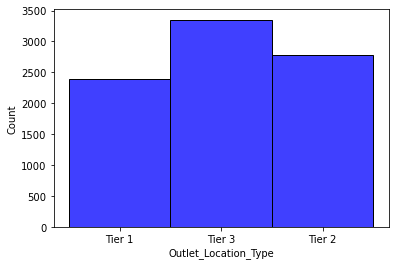

In [13]:
sns.histplot(df["Outlet_Location_Type"],color="blue")

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

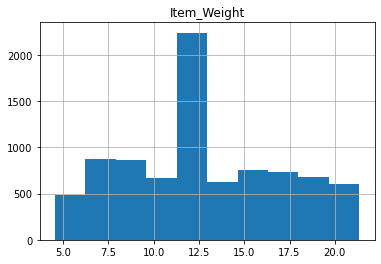

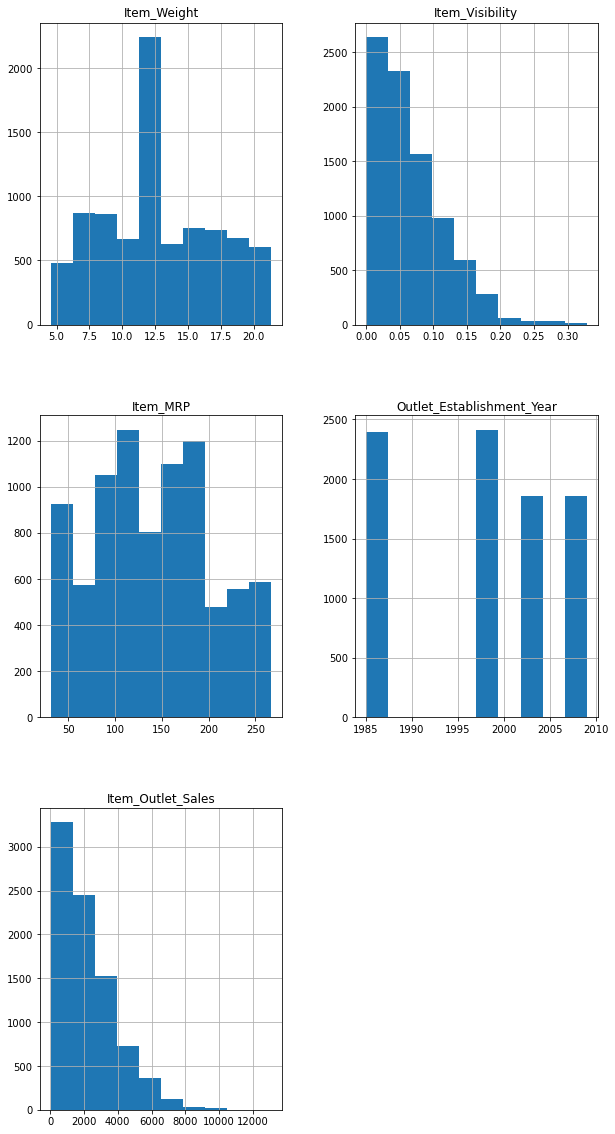

In [14]:
df.hist("Item_Weight")
df.hist(figsize=(10,20))
#plt.hist(df["Outlet_Type"],figsize=(12,3),color="violet")

(array([5577.,    0.,    0.,  928.,    0.,    0., 1083.,    0.,    0.,
         935.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

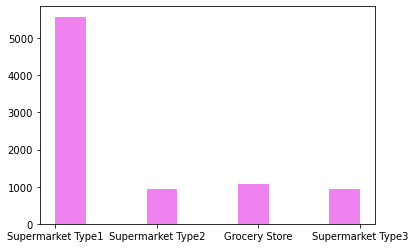

In [15]:
plt.hist(df["Outlet_Type"],color="violet")

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

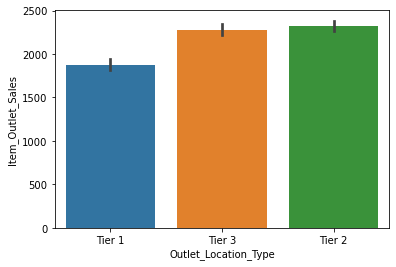

In [16]:
sns.barplot(x="Outlet_Location_Type",y="Item_Outlet_Sales",data=df)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

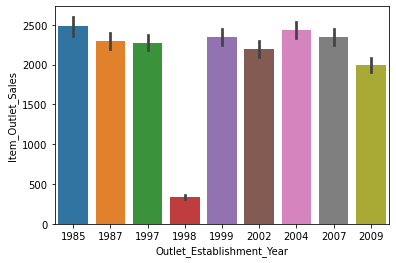

In [17]:
sns.barplot(x="Outlet_Establishment_Year",y="Item_Outlet_Sales",data=df)

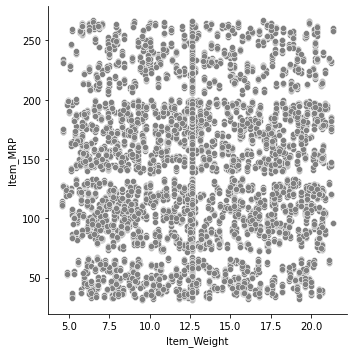

In [18]:
sns.relplot(x="Item_Weight",y="Item_MRP",data=df,color="grey")

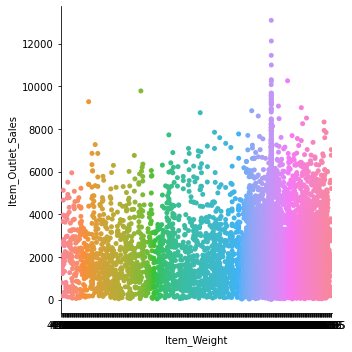

In [19]:
sns.catplot(x="Item_Weight",y="Item_Outlet_Sales",data=df)

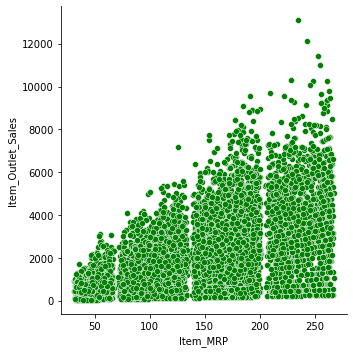

In [20]:
sns.relplot(x="Item_MRP",y="Item_Outlet_Sales",data=df,color="green")

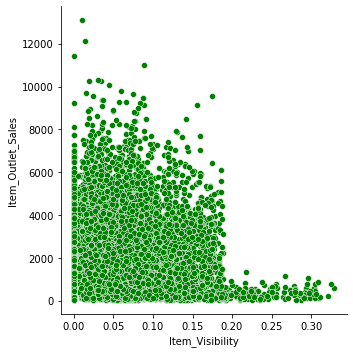

In [21]:
sns.relplot(x="Item_Visibility",y="Item_Outlet_Sales",data=df,color="green")

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

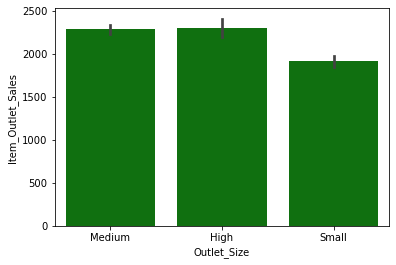

In [22]:
sns.barplot(x="Outlet_Size",y="Item_Outlet_Sales",data=df,color="green")

<AxesSubplot:xlabel='Item_Outlet_Sales'>

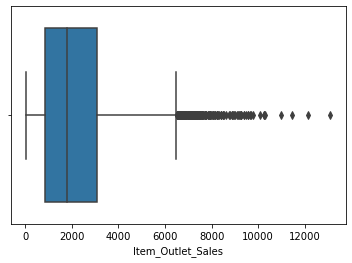

In [23]:
sns.boxplot(df["Item_Outlet_Sales"])

In [24]:
df['Item_Identifier']=le.fit_transform(df['Item_Identifier'])

In [25]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])

In [26]:
df['Item_Type']=le.fit_transform(df['Item_Type'])

In [27]:
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])

In [28]:
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])

In [29]:
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])

In [30]:
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [31]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])

In [32]:
df["Item_Weight"]=np.log(df["Item_Weight"])

In [33]:
df["Item_Visibility"]=np.log(df["Item_Visibility"])

In [34]:
df["Item_MRP"]=np.log(df["Item_MRP"])

In [35]:
df["Outlet_Establishment_Year"]=np.log(df["Outlet_Establishment_Year"])

In [36]:
df["Item_Outlet_Sales"]=np.log(df["Item_Outlet_Sales"])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int32(6), int64(1)
memory usage: 599.4 KB


In [38]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,2.230014,1,-4.132215,4,5.520697,9,7.600402,1,0,1,8.225540
1,8,1.778336,2,-3.948780,14,3.876794,3,7.605392,1,2,2,6.094524
2,662,2.862201,1,-4.088756,10,4.953133,9,7.600402,1,0,1,7.648392
3,1121,2.954910,2,-inf,6,5.204529,0,7.599902,1,2,0,6.596300
4,1297,2.189416,1,-inf,9,3.986414,1,7.594381,0,2,1,6.902446
5,758,2.341325,2,-inf,0,3.939654,3,7.605392,1,2,2,6.321863
6,696,2.613740,2,-4.362923,13,4.054543,1,7.594381,0,2,1,5.839341
7,738,2.533697,1,-2.059875,13,4.679927,5,7.593374,1,2,3,8.299724
8,440,2.785011,2,-4.093118,5,4.574428,7,7.601902,1,1,1,6.981562
9,990,2.954910,2,-2.359689,5,5.235492,2,7.604396,1,1,1,8.457557


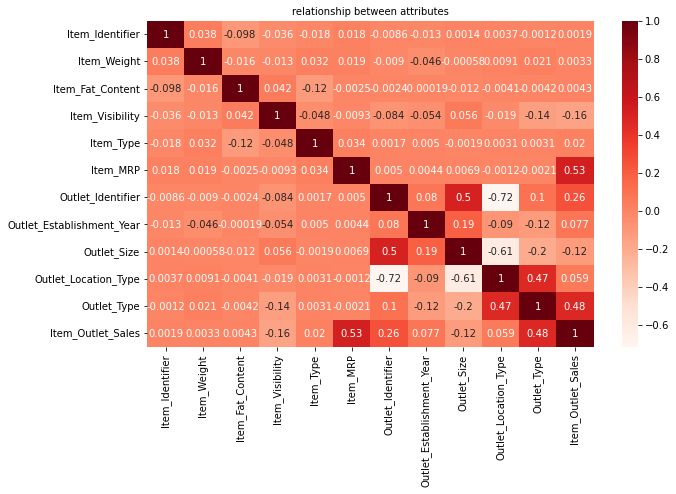

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('relationship between attributes',fontsize=10)
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int32(6), int64(1)
memory usage: 599.4 KB


In [41]:
#outlier treatment
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [42]:
low,upp=remove_outlier(df['Item_Weight'])
df["Item_Weight"]=np.where(df['Item_Weight']>upp,upp,df['Item_Weight'])
df["Item_Weight"]=np.where(df['Item_Weight']<low,low,df['Item_Weight'])

In [43]:
low,upp=remove_outlier(df['Item_Visibility'])
df["Item_Visibility"]=np.where(df['Item_Visibility']>upp,upp,df['Item_Visibility'])
df["Item_Visibility"]=np.where(df['Item_Visibility']<low,low,df['Item_Visibility'])

In [44]:
low,upp=remove_outlier(df['Item_MRP'])
df["Item_MRP"]=np.where(df['Item_MRP']>upp,upp,df['Item_MRP'])
df["Item_MRP"]=np.where(df['Item_MRP']<low,low,df['Item_MRP'])

In [45]:
low,upp=remove_outlier(df['Outlet_Establishment_Year'])
df["Outlet_Establishment_Year"]=np.where(df['Outlet_Establishment_Year']>upp,upp,df['Outlet_Establishment_Year'])
df["Outlet_Establishment_Year"]=np.where(df['Outlet_Establishment_Year']<low,low,df['Outlet_Establishment_Year'])

In [46]:
low,upp=remove_outlier(df['Item_Outlet_Sales'])
df["Item_Outlet_Sales"]=np.where(df['Item_Outlet_Sales']>upp,upp,df['Item_Outlet_Sales'])
df["Item_Outlet_Sales"]=np.where(df['Item_Outlet_Sales']<low,low,df['Item_Outlet_Sales'])

In [47]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.037995,-0.098114,-0.023193,-0.017973,0.018377,-0.008602,-0.012777,0.001389,0.003656,-0.001178,0.001957
Item_Weight,0.037995,1.000000,-0.015923,-0.000437,0.032100,0.018909,-0.008993,-0.046034,-0.000581,0.009112,0.021456,0.003395
Item_Fat_Content,-0.098114,-0.015923,1.000000,0.037621,-0.115958,-0.002510,-0.002357,-0.000193,-0.012058,-0.004102,-0.004214,0.005475
Item_Visibility,-0.023193,-0.000437,0.037621,1.000000,-0.038924,0.001462,-0.063099,-0.042228,0.043778,-0.018060,-0.111893,-0.121874
Item_Type,-0.017973,0.032100,-0.115958,-0.038924,1.000000,0.033743,0.001656,0.004969,-0.001859,0.003084,0.003053,0.020229
Item_MRP,0.018377,0.018909,-0.002510,0.001462,0.033743,1.000000,0.004970,0.004368,0.006870,-0.001122,-0.002033,0.527557
Outlet_Identifier,-0.008602,-0.008993,-0.002357,-0.063099,0.001656,0.004970,1.000000,0.079894,0.504603,-0.716176,0.099873,0.260692
Outlet_Establishment_Year,-0.012777,-0.046034,-0.000193,-0.042228,0.004969,0.004368,0.079894,1.000000,0.193743,-0.090103,-0.123156,0.072496
Outlet_Size,0.001389,-0.000581,-0.012058,0.043778,-0.001859,0.006870,0.504603,0.193743,1.000000,-0.614311,-0.201483,-0.121475
Outlet_Location_Type,0.003656,0.009112,-0.004102,-0.018060,0.003084,-0.001122,-0.716176,-0.090103,-0.614311,1.000000,0.467219,0.059493


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int32(6), int64(1)
memory usage: 599.4 KB


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
got=MinMaxScaler()

In [51]:
df['Item_Weight']=got.fit_transform(df[['Item_Weight']])

In [52]:
df['Item_Fat_Content']=got.fit_transform(df[['Item_Fat_Content']])

In [53]:
df['Item_Visibility']=got.fit_transform(df[['Item_Visibility']])

In [54]:
df['Item_Type']=got.fit_transform(df[['Item_Type']])

In [55]:
df['Item_MRP']=got.fit_transform(df[['Item_MRP']])

In [56]:
df['Outlet_Identifier']=got.fit_transform(df[['Outlet_Identifier']])

In [57]:
df['Outlet_Establishment_Year']=got.fit_transform(df[['Outlet_Establishment_Year']])

In [58]:
df['Outlet_Size']=got.fit_transform(df[['Outlet_Size']])

In [59]:
df['Outlet_Location_Type']=got.fit_transform(df[['Outlet_Location_Type']])

In [60]:
df['Item_Outlet_Sales']=got.fit_transform(df[['Item_Outlet_Sales']])

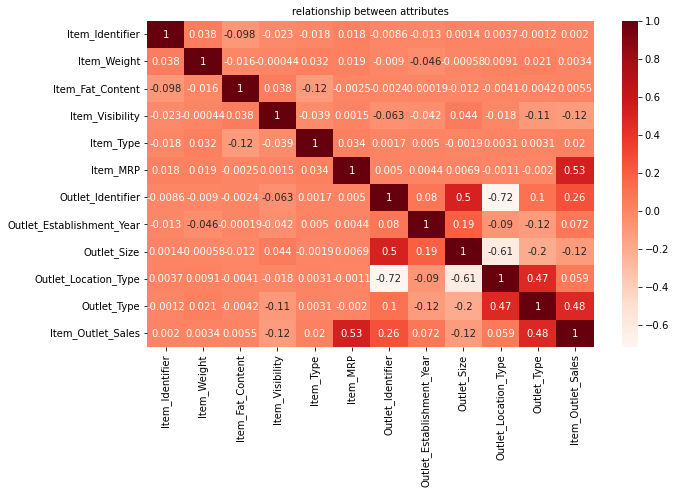

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('relationship between attributes',fontsize=10)
plt.show()

In [62]:
x=df.drop(['Item_Outlet_Sales',"Item_Identifier","Item_Weight","Item_Fat_Content","Item_Type"],axis=1)
y=df[['Item_Outlet_Sales']]

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=1)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr=LinearRegression()

In [67]:
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
lr.score(x_train,y_train)

0.6014193071291034

In [69]:
lr.score(x_test,y_test)

0.6175071011751623

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
fr=RandomForestRegressor(max_depth=12,max_samples=200)

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=1)

In [73]:
fr.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, max_samples=200)

In [74]:
fr.score(x_train,y_train)

0.7398053305159213

In [75]:
fr.score(x_test,y_test)

0.7363245913167451

In [76]:
from sklearn.neighbors import KNeighborsRegressor

In [77]:
knn=KNeighborsRegressor(n_neighbors=9)

In [78]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [79]:
knn.score(x_train,y_train)

0.7614851924198249

In [80]:
knn.score(x_test,y_test)

0.7226093352989706

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

In [82]:
gr=GradientBoostingRegressor(max_depth=5)

In [83]:
gr.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5)

In [84]:
gr.score(x_train,y_train)

0.7871035983955798

In [85]:
gr.score(x_test,y_test)

0.7350217410876114

In [86]:
from sklearn.model_selection import cross_val_score,KFold

In [87]:
logreg=LinearRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
print(score)
print(score.mean())

Cross Validation Scores are [0.61437615 0.61058748 0.58705267 0.58863294 0.6237961 ]
Average Cross Validation score :0.6048890696011675
[0.61437615 0.61058748 0.58705267 0.58863294 0.6237961 ]
0.6048890696011675


In [88]:
from sklearn.svm import SVR

In [89]:
svc=SVR( gamma=50)

In [90]:
svc.fit(x_train,y_train)

SVR(gamma=50)

In [91]:
svc.score(x_train,y_train)

0.7584434445666369

In [92]:
svc.score(x_test,y_test)

0.7111722277756674

In [93]:
from xgboost import XGBRegressor

In [94]:
xg=XGBRegressor(n_estimators=15,max_depth=7)

In [95]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=15, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [96]:
xg.score(x_train,y_train)

0.7978159745078172

In [97]:
xg.score(x_test,y_test)

0.7334121630008134

In [98]:
from sklearn.model_selection import cross_val_score,KFold

In [99]:
logreg=LinearRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
print(score)
print(score.mean())

Cross Validation Scores are [0.61437615 0.61058748 0.58705267 0.58863294 0.6237961 ]
Average Cross Validation score :0.6048890696011675
[0.61437615 0.61058748 0.58705267 0.58863294 0.6237961 ]
0.6048890696011675


In [100]:
#from sklearn.model_selection import LeaveOneOut,cross_val_score
#loo=LeaveOneOut()
#tree=RandomForestRegressor(n_estimators=10,max_depth=5,n_jobs=-1)
#score=cross_val_score(tree,x,y,cv=loo)
#print("Cross Validation Scores are {}".format(score))
#print("Average Cross Validation score :{}".format(score.mean()))


In [101]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
frr=RandomForestRegressor()
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)

scores=cross_val_score(frr,x,y,cv=shuffle_split)

print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.69308136 0.68588721 0.70197231 0.68635779 0.67742581 0.70363331
 0.70650183 0.69065595 0.67366434 0.70303757]
Average Cross Validation score :0.6922217492872907


In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
param_grid={'bootstrap':[True],
            'max_depth':[5,6,7],
            'max_features':[2,5,6,7],
            'min_samples_leaf':[3,4,5],
            'min_samples_split':[5,10],
            'n_estimators':[5,6,7]}

In [104]:
rf=RandomForestRegressor(random_state=1)

In [105]:
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,
                        cv=3,return_train_score=True)

In [106]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
             param_grid={'bootstrap': [True], 'max_depth': [5, 6, 7],
                         'max_features': [2, 5, 6, 7],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [5, 6, 7]},
             return_train_score=True)

In [107]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 7}

In [108]:
best_grid=grid_search.best_estimator_
best_grid.score(x_test,y_test)

0.7357772338776878

In [109]:
best_grid.score(x_train,y_train)

0.7336791449372975

In [110]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 25, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [111]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [10, 25], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [112]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 9, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(x_train, y_train);



Fitting 9 folds for each of 5 candidates, totalling 45 fits


In [113]:
rf_random.best_params_

{'n_estimators': 25,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5,
 'bootstrap': True}

In [114]:
best_random=rf_random.best_estimator_
best_random.score(x_test,y_test)


0.7370381588900428

In [115]:
best_random.score(x_train,y_train)

0.7343667102547751